In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import mysql.connector as sql
import warnings
warnings.filterwarnings("ignore")

In [3]:
my_db = sql.connect(username = "root",
                   host = "localhost",
                   password = "Pass@123",
                   database = "akshay")

In [4]:
query = "select * from credit"
df = pd.read_sql(query,my_db)
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [6]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [7]:
char = df.select_dtypes("object")
for i in char.columns:
    print(i)
    print(df[i].value_counts())
    print("*" * 10)

Gender
Female    86
Male      78
Name: Gender, dtype: int64
**********
Education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: Education, dtype: int64
**********
Marital Status
Married    87
Single     77
Name: Marital Status, dtype: int64
**********
Home Ownership
Owned     111
Rented     53
Name: Home Ownership, dtype: int64
**********
Credit Score
High       113
Average     36
Low         15
Name: Credit Score, dtype: int64
**********


In [8]:
df["Gender"] = (np.where(df["Gender"]=="Female",1,0))
df["Home Ownership"] = (np.where(df["Home Ownership"]=="Rented",1,0))
df["Marital Status"] = (np.where(df["Marital Status"]=="Married",1,0))

In [9]:
df["Education"].value_counts().to_dict()

{"Bachelor's Degree": 42,
 "Master's Degree": 36,
 'Doctorate': 31,
 'High School Diploma': 30,
 "Associate's Degree": 25}

In [10]:
df["Education"].replace({"Bachelor's Degree": 4,
 "Master's Degree": 3,
 'Doctorate': 2,
 'High School Diploma': 1,
 "Associate's Degree": 0},inplace = True)

In [11]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,1,50000,4,0,0,1,High
1,30,0,100000,3,1,2,0,High
2,35,1,75000,2,1,1,0,High
3,40,0,125000,1,0,0,0,High
4,45,1,100000,4,1,3,0,High


In [12]:
df["Credit Score"].value_counts().to_dict()

{'High': 113, 'Average': 36, 'Low': 15}

In [13]:
df["Credit Score"].replace({'High': 2, 'Average': 1, 'Low': 0},inplace=True)

In [14]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,1,50000,4,0,0,1,2
1,30,0,100000,3,1,2,0,2
2,35,1,75000,2,1,1,0,2
3,40,0,125000,1,0,0,0,2
4,45,1,100000,4,1,3,0,2


In [15]:
df.corr()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
Age,1.000000,-0.235343,0.699464,0.031801,0.517723,0.055390,-0.713803,0.669030
Gender,-0.235343,1.000000,-0.495738,0.087046,0.278362,0.442139,0.031519,-0.194962
Income,0.699464,-0.495738,1.000000,0.222989,0.471004,0.084547,-0.704928,0.744407
Education,0.031801,0.087046,0.222989,1.000000,0.284837,0.452550,-0.323851,0.407180
Marital Status,0.517723,0.278362,0.471004,0.284837,1.000000,0.696984,-0.708374,0.619854
Number of Children,0.055390,0.442139,0.084547,0.452550,0.696984,1.000000,-0.497129,0.426280
Home Ownership,-0.713803,0.031519,-0.704928,-0.323851,-0.708374,-0.497129,1.000000,-0.854970
Credit Score,0.669030,-0.194962,0.744407,0.407180,0.619854,0.426280,-0.854970,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 164 non-null    int64
 1   Gender              164 non-null    int32
 2   Income              164 non-null    int64
 3   Education           164 non-null    int64
 4   Marital Status      164 non-null    int32
 5   Number of Children  164 non-null    int64
 6   Home Ownership      164 non-null    int32
 7   Credit Score        164 non-null    int64
dtypes: int32(3), int64(5)
memory usage: 8.5 KB


<AxesSubplot: >

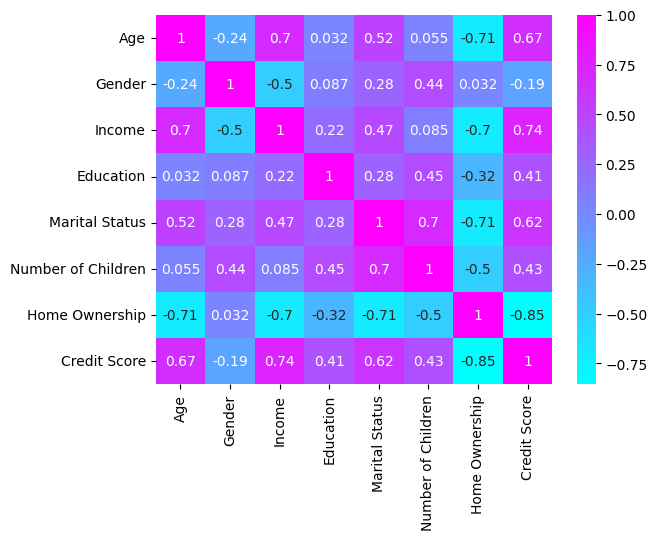

In [17]:
sns.heatmap(df.corr(),annot=True,cmap="cool")

In [18]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,1,50000,4,0,0,1,2
1,30,0,100000,3,1,2,0,2
2,35,1,75000,2,1,1,0,2
3,40,0,125000,1,0,0,0,2
4,45,1,100000,4,1,3,0,2


In [19]:
df["avg_income"] = np.average(df["Income"])

In [20]:
df["standard_deviation"] = np.std(df["Income"])

In [21]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,avg_income,standard_deviation
0,25,1,50000,4,0,0,1,2,83765.243902,32358.200217
1,30,0,100000,3,1,2,0,2,83765.243902,32358.200217
2,35,1,75000,2,1,1,0,2,83765.243902,32358.200217
3,40,0,125000,1,0,0,0,2,83765.243902,32358.200217
4,45,1,100000,4,1,3,0,2,83765.243902,32358.200217


<AxesSubplot: xlabel='Income', ylabel='Credit Score'>

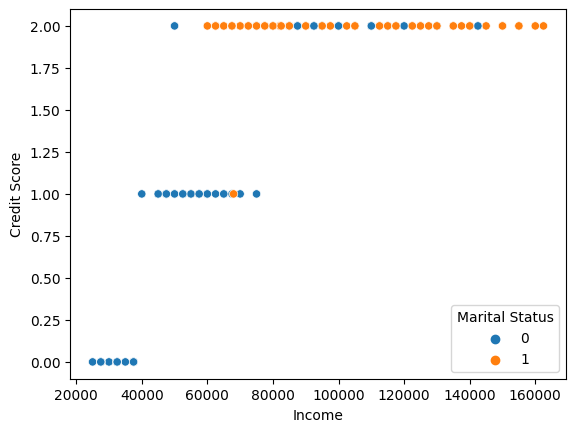

In [22]:
sns.scatterplot(data = df,x = "Income",y = "Credit Score",hue = "Marital Status")

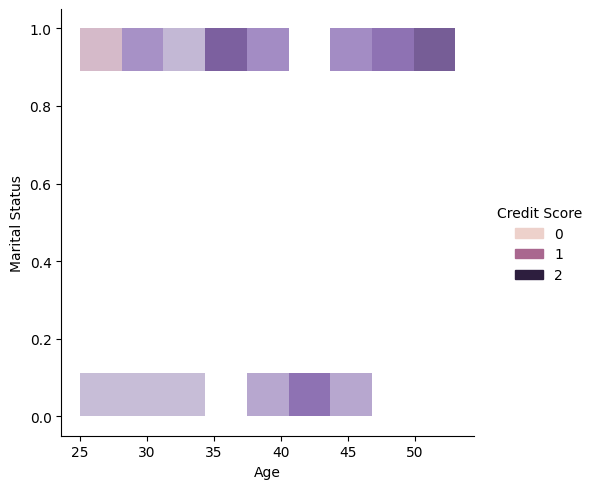

In [23]:
sns.displot(data = df,x = "Age",y = "Marital Status",hue="Credit Score")

In [24]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,avg_income,standard_deviation
0,25,1,50000,4,0,0,1,2,83765.243902,32358.200217
1,30,0,100000,3,1,2,0,2,83765.243902,32358.200217
2,35,1,75000,2,1,1,0,2,83765.243902,32358.200217
3,40,0,125000,1,0,0,0,2,83765.243902,32358.200217
4,45,1,100000,4,1,3,0,2,83765.243902,32358.200217


<AxesSubplot: xlabel='Income', ylabel='Count'>

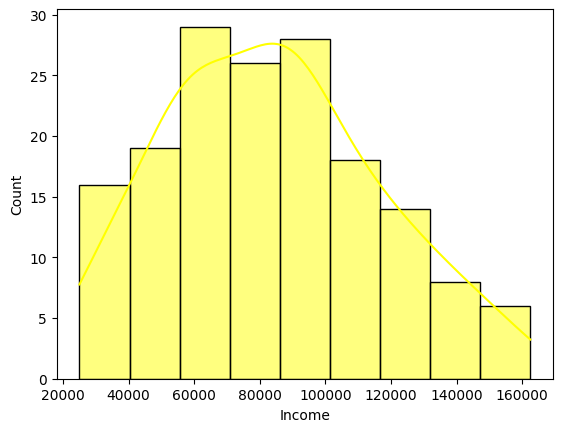

In [25]:
sns.histplot(data =df , x = "Income",kde="Density",color="Yellow",hue_order="Credit Score")

In [26]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,avg_income,standard_deviation
0,25,1,50000,4,0,0,1,2,83765.243902,32358.200217
1,30,0,100000,3,1,2,0,2,83765.243902,32358.200217
2,35,1,75000,2,1,1,0,2,83765.243902,32358.200217
3,40,0,125000,1,0,0,0,2,83765.243902,32358.200217
4,45,1,100000,4,1,3,0,2,83765.243902,32358.200217


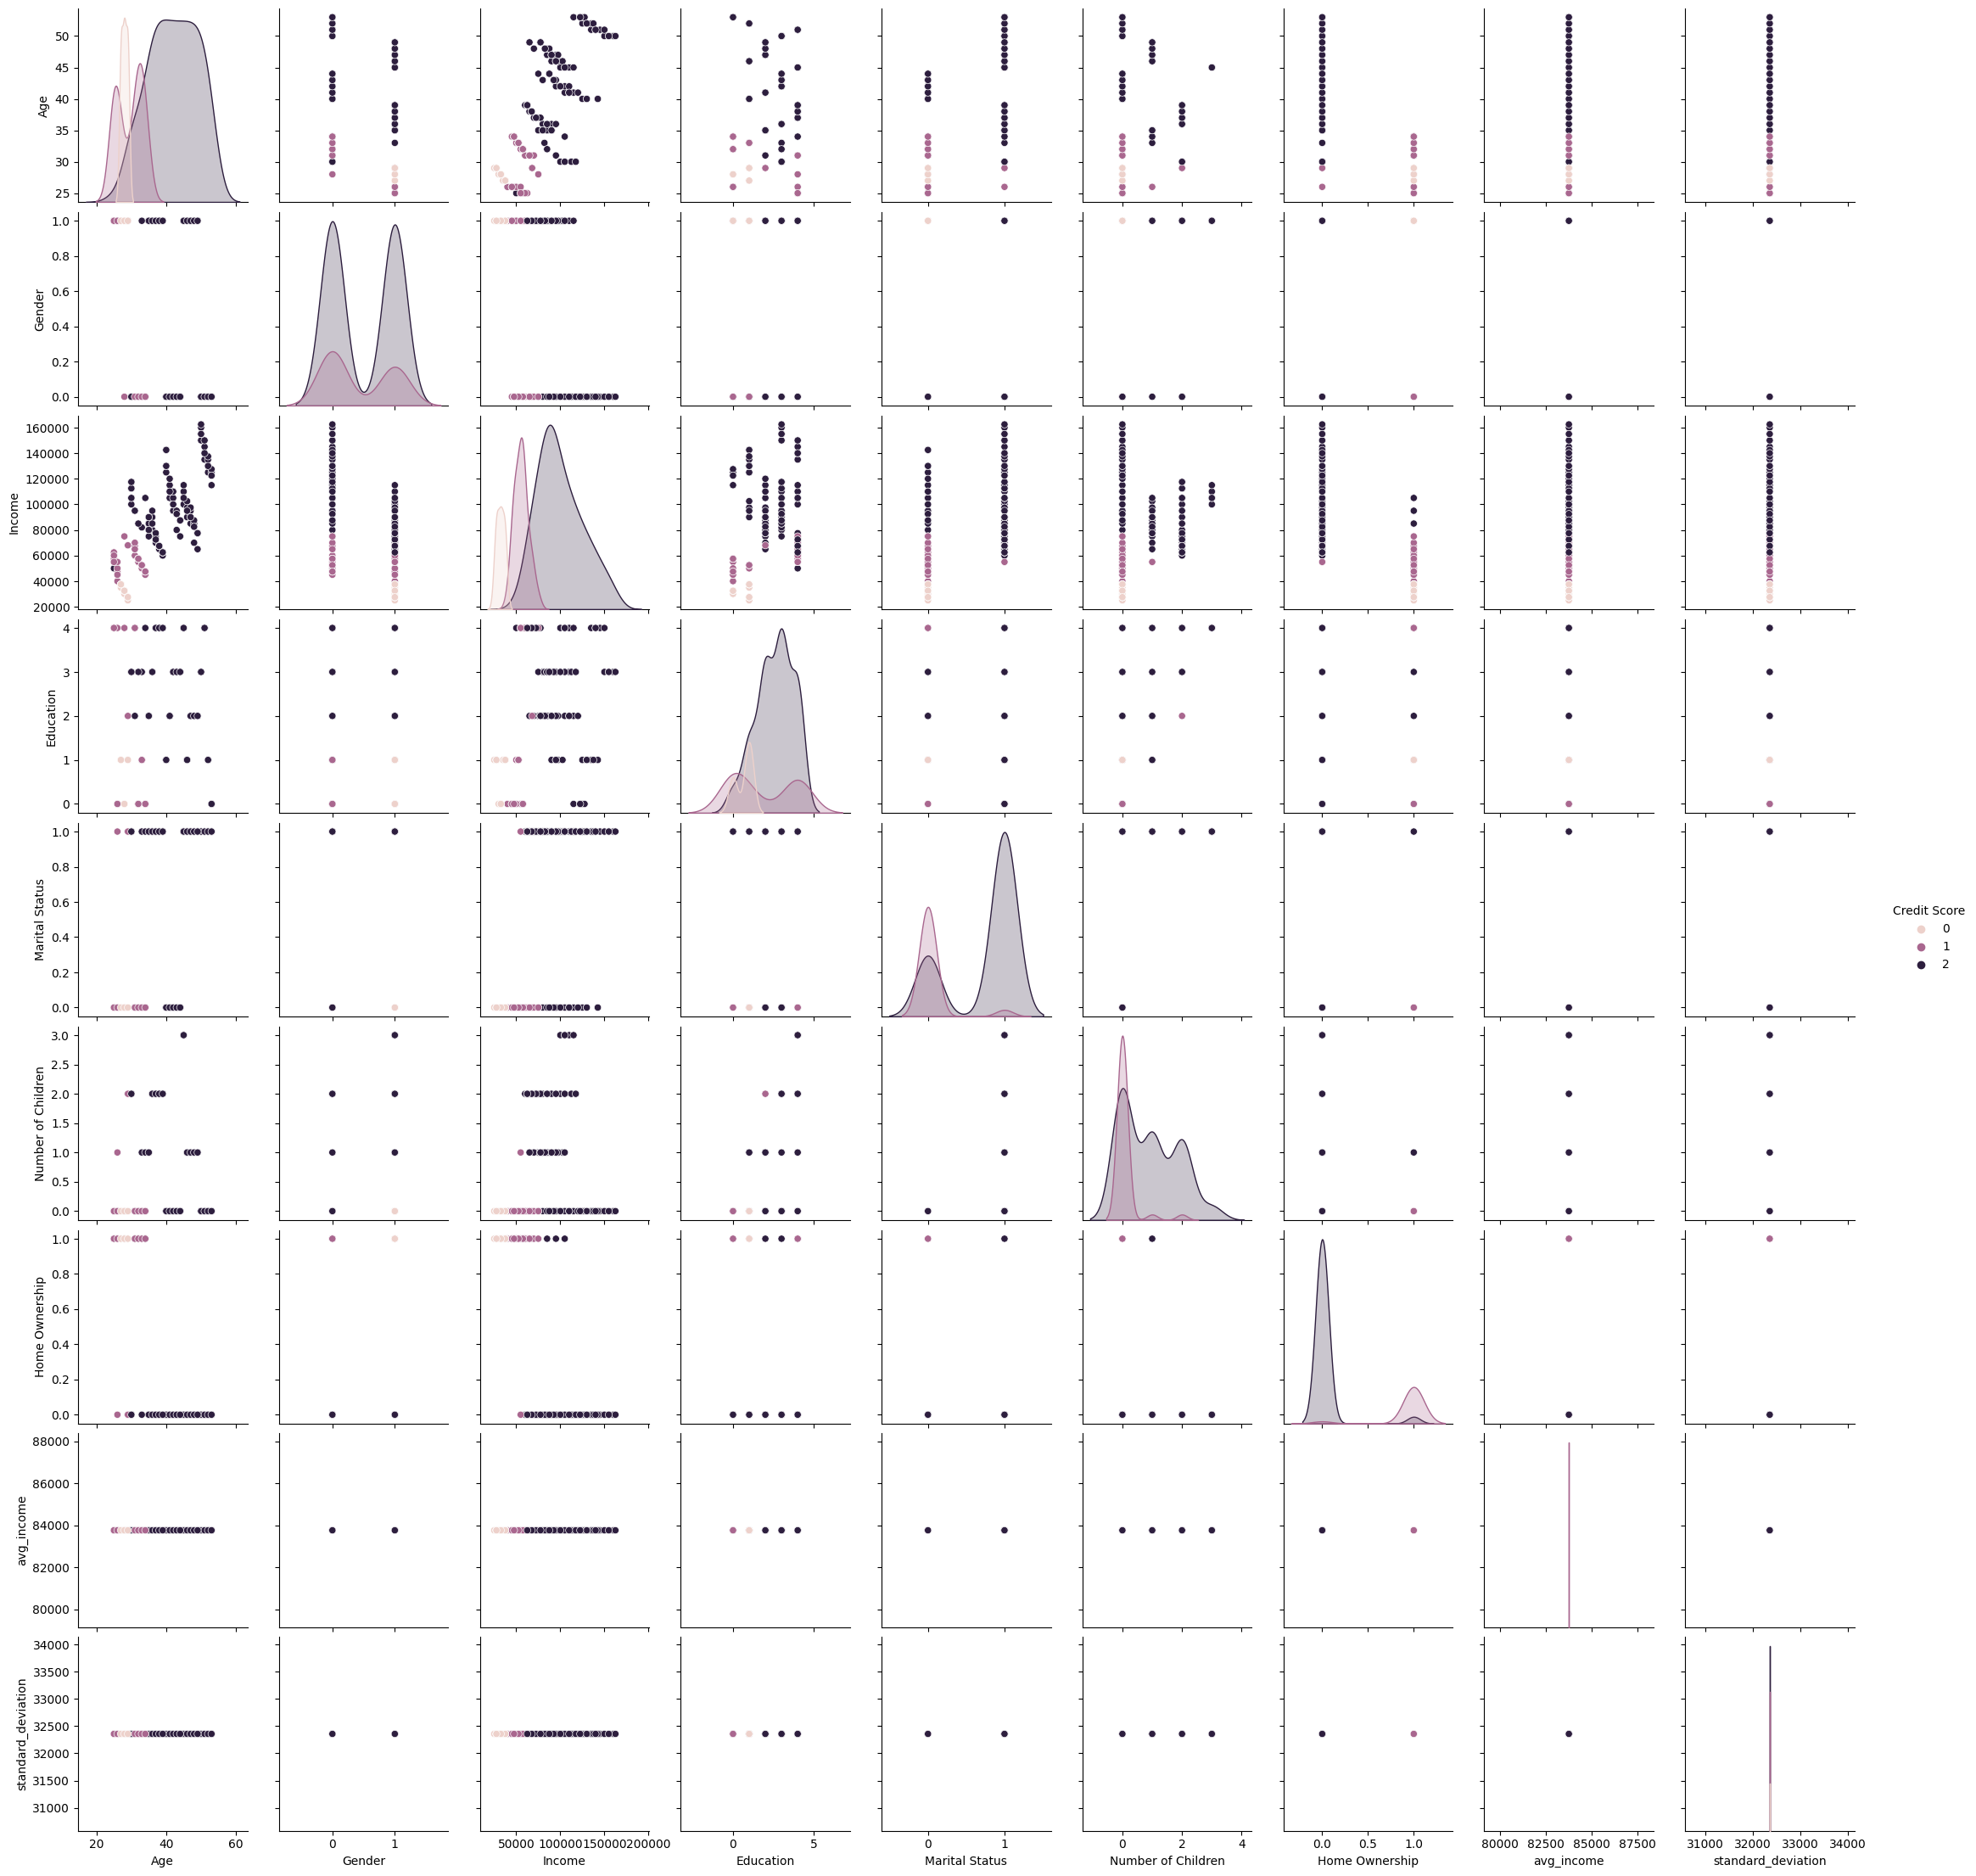

In [27]:
sns.pairplot(df,hue="Credit Score")

In [28]:
x = df.drop("Credit Score",axis = 1)
y =df["Credit Score"]

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=65,stratify=y)

In [30]:
log_model = LogisticRegression(multi_class='ovr')
log_model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [31]:
y_pred_train = log_model.predict(x_train)

In [32]:
acc = accuracy_score(y_train,y_pred_train)
acc

1.0

In [33]:
conf = confusion_matrix(y_train,y_pred_train)
conf

array([[10,  0,  0],
       [ 0, 25,  0],
       [ 0,  0, 79]], dtype=int64)

In [34]:
import matplotlib.pyplot as plt

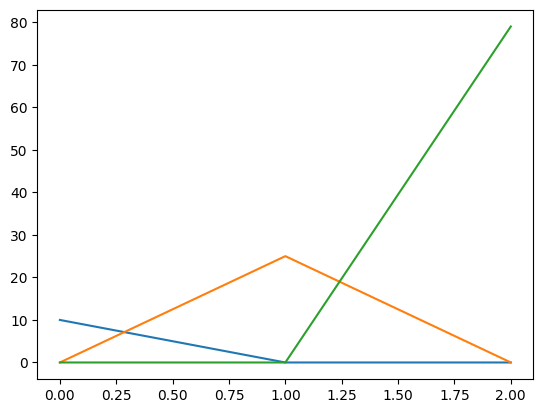

In [35]:
plt.plot(conf)

In [36]:
clas = classification_report(y_train,y_pred_train)
print(clas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        79

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [37]:
y_pred_test = log_model.predict(x_test)
acc = accuracy_score(y_test,y_pred_test)
acc

0.98

In [38]:
conf = confusion_matrix(y_test,y_pred_test)
print(conf)

[[ 5  0  0]
 [ 0 11  0]
 [ 0  1 33]]


In [39]:
clas = classification_report(y_test,y_pred_test)
print(clas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.92      1.00      0.96        11
           2       1.00      0.97      0.99        34

    accuracy                           0.98        50
   macro avg       0.97      0.99      0.98        50
weighted avg       0.98      0.98      0.98        50



In [40]:
y_pred_proba = log_model.predict_proba(x_train)
y_pred_proba[:,1]

array([9.99999213e-01, 9.99995815e-01, 7.47967768e-04, 1.01878509e-01,
       5.92478681e-04, 4.50567466e-03, 3.98267328e-01, 3.59487028e-03,
       2.12483302e-01, 8.05164221e-02, 8.78531799e-02, 1.74716289e-01,
       7.43624983e-02, 6.97239110e-02, 3.59487028e-03, 4.20510218e-01,
       9.98059961e-01, 6.12020494e-03, 6.04051619e-02, 9.97291996e-01,
       8.14128729e-02, 4.06719979e-01, 1.96274616e-01, 5.59344388e-03,
       1.61872248e-02, 9.63354674e-01, 7.10672019e-04, 7.53892115e-02,
       4.20510218e-01, 3.94527762e-01, 9.99998010e-01, 9.96348088e-01,
       1.85204248e-01, 7.47967768e-04, 4.06719979e-01, 9.99999213e-01,
       1.74716289e-01, 1.01878509e-01, 4.26928103e-03, 1.71905073e-02,
       9.93054966e-01, 7.26724075e-04, 9.76610818e-01, 9.99999852e-01,
       9.93054966e-01, 1.20807514e-02, 7.32054194e-02, 1.22670305e-02,
       5.59846717e-04, 4.42744976e-03, 6.34053183e-04, 1.71905073e-02,
       9.67170122e-01, 4.26928103e-03, 5.59846717e-04, 4.08079723e-03,
      

In [41]:
from sklearn.metrics import roc_curve

In [42]:
fpr,tpr,thresh = roc_curve(y_train,y_pred_proba[:,1],pos_label=1)

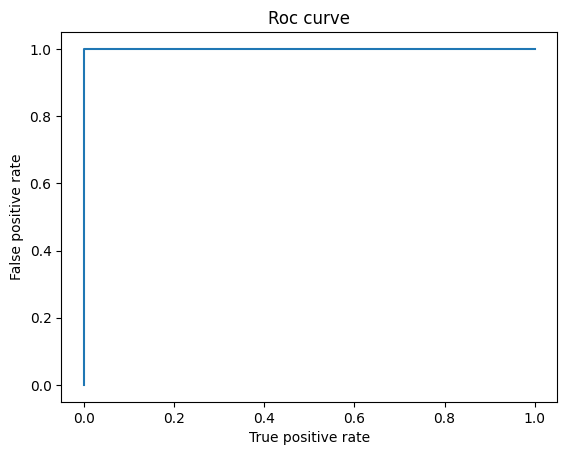

In [43]:
plt.title("Roc curve")
plt.xlabel("True positive rate")
plt.ylabel("False positive rate")
plt.plot(fpr,tpr)

In [44]:
new_df = pd.DataFrame({"Fpr":fpr,"Tpr":tpr,"Thresh":thresh})

In [45]:
new_df

,Fpr,Tpr,Thresh
0,0.000000,0.00,2.000000
1,0.000000,0.04,1.000000
2,0.000000,0.12,1.000000
3,0.000000,0.20,0.999999
4,0.000000,0.32,0.999998
5,0.000000,0.56,0.997292
6,0.000000,0.68,0.996348
7,0.000000,0.72,0.994843
8,0.000000,0.80,0.993055
9,0.000000,1.00,0.825794


In [46]:
new_df.loc[max(new_df["Fpr"])]["Thresh"]

0.9999999417315951

In [47]:
new_df

,Fpr,Tpr,Thresh
0,0.000000,0.00,2.000000
1,0.000000,0.04,1.000000
2,0.000000,0.12,1.000000
3,0.000000,0.20,0.999999
4,0.000000,0.32,0.999998
5,0.000000,0.56,0.997292
6,0.000000,0.68,0.996348
7,0.000000,0.72,0.994843
8,0.000000,0.80,0.993055
9,0.000000,1.00,0.825794


In [48]:
pickle.dump(log_model,open("classification.pkl","wb"))

In [50]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    int64  
 1   Gender              164 non-null    int32  
 2   Income              164 non-null    int64  
 3   Education           164 non-null    int64  
 4   Marital Status      164 non-null    int32  
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    int32  
 7   avg_income          164 non-null    float64
 8   standard_deviation  164 non-null    float64
dtypes: float64(2), int32(3), int64(4)
memory usage: 9.7 KB
